# **Analise de dados sobre os presidentes do Brasil**

---



#### Nesta analise de dados vamos responder algumas perguntas sobre os presidentes do Brasil.


*   Quem foi o presidente com maior numero de votos da história?
*   Quem foi o presidente com maior numero de filhos?
*   Quem foi o presidente que mais tempo governou o país?
*   Quem foi até hoje o presidente que mais tempo viveu?
*   Curiosidades sobre a altura dos presidente.
*   Qual estado elegeu mais presidentes?
*   Qual a profissão deles?



## **Analise exploratoria dos dados**

---



In [1]:
# importando as bibliotecas necessarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import date
import seaborn as sn

In [4]:
# importando a tabela
Dados = pd.read_excel('/content/Dados_presidentes.xlsx')
Dados = pd.DataFrame(Dados)
Dados.head(3)       # verificando as primeiras 3 linhas de nosso dataframe

,Nome,Data_nascimento,Falecimento,Inicio_mandato,Fim_mandato,Naturalidade,Estado,Altura,Num_Filhos,Profissões,Votos
0,Marechal Manoel Deodoro da Fonseca,05/08/1827,28/08/1892,15/11/1889,23/11/1891,Alagoas da Lagoa do Sul- AL,AL,178,0,Militar,0
1,Marechal Floriano Vieira Peixoto,30/04/1839,29/06/1895,23/11/1891,15/11/1894,Maceió - AL,AL,173,8,Militar,0
2,Prudente José de Moraes e Barros,04/10/1841,1902-12-03 00:00:00,15/11/1894,15/11/1898,Mairinque -SP,SP,167,9,Advogado,0


In [5]:
Dados.shape          # Exibe a quantidade de linhas e colunas da tabela

(39, 11)

In [6]:
Dados.info()  # Exibe o tipo de dados que há em cada coluna da tabela

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Nome             39 non-null     object
 1   Data_nascimento  39 non-null     object
 2   Falecimento      39 non-null     object
 3   Inicio_mandato   39 non-null     object
 4   Fim_mandato      39 non-null     object
 5   Naturalidade     39 non-null     object
 6   Estado           39 non-null     object
 7   Altura           39 non-null     int64 
 8   Num_Filhos       39 non-null     int64 
 9   Profissões       39 non-null     object
 10  Votos            39 non-null     int64 
dtypes: int64(3), object(8)
memory usage: 3.5+ KB


In [7]:
Colunas = Dados.columns            # Exibe todas as colunas da tabela
Colunas

Index(['Nome', 'Data_nascimento', 'Falecimento', 'Inicio_mandato',
       'Fim_mandato', 'Naturalidade', 'Estado', 'Altura ', 'Num_Filhos',
       'Profissões', 'Votos'],
      dtype='object')

In [8]:
Colunas = Dados.columns.to_list()    # Exibe todas as colunas em uma lista
Colunas

['Nome',
 'Data_nascimento',
 'Falecimento',
 'Inicio_mandato',
 'Fim_mandato',
 'Naturalidade',
 'Estado',
 'Altura ',
 'Num_Filhos',
 'Profissões',
 'Votos']

In [9]:
Dados.describe()

,Altura,Num_Filhos,Votos
count,39.000000,39.000000,3.900000e+01
mean,170.025641,4.282051,8.179427e+06
std,5.927133,2.809277,1.882665e+07
min,157.000000,0.000000,0.000000e+00
25%,165.000000,2.000000,0.000000e+00
50%,168.000000,4.000000,0.000000e+00
75%,175.000000,5.000000,1.538706e+06
max,185.000000,12.000000,6.034600e+07


In [10]:
print("Número de linhas: " + str(Dados.shape[0]))       # Exibe o numero de linhas

Número de linhas: 39


In [11]:
print("Número de Colunas: " + str(Dados.shape[1]))       # Exibe o numero de Colunas

Número de Colunas: 11


In [12]:
# Aplicando filtro na tabela
mineiros = Dados[Dados["Estado"] == "MG"]   # filtrando os dados onde a Coluna Estado é igual a MG
mineiros.head(3)

,Nome,Data_nascimento,Falecimento,Inicio_mandato,Fim_mandato,Naturalidade,Estado,Altura,Num_Filhos,Profissões,Votos
5,Afonso Augusto Moreira Pena,30/11/1847,1909-06-14 00:00:00,1906-11-15 00:00:00,1909-06-14 00:00:00,Santa Bárbara - MG,MG,165,12,Advogado,0
8,Venceslau Brás Pereira Gomes,26/02/1868,1966-05-15 00:00:00,1914-11-15 00:00:00,1918-11-15 00:00:00,Itajubá - MG,MG,175,7,Advogado,0
9,Delfim Moreira da Costa Ribeiro,07/11/1868,1920-07-01 00:00:00,1918-11-15 00:00:00,1919-07-28 00:00:00,Cristina - MG,MG,165,6,Médico,0


In [50]:
selecao = Dados[Dados.columns[0:3]]   # selecionando apenas colunas especificas
selecao.head(3)

,Nome,Data_nascimento,Falecimento
0,Marechal Manoel Deodoro da Fonseca,1827-05-08,1892-08-28
1,Marechal Floriano Vieira Peixoto,1839-04-30,1895-06-29
2,Prudente José de Moraes e Barros,1841-04-10,1902-12-03


In [14]:
Dados['Votos'].replace('Indireto',0 , inplace=True)  # Quando se quer alterar dados de colunas específicas

In [15]:
# Altera o tipo de dados de uma coluna para o tipo de data
Dados['Falecimento'] = pd.to_datetime(Dados['Falecimento'])

<ipython-input-15-f7ef97119f37>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  Dados['Falecimento'] = pd.to_datetime(Dados['Falecimento'])


In [16]:
# Transformando a coluna para tipo data
Dados['Data_nascimento'] = pd.to_datetime(Dados['Data_nascimento'])

<ipython-input-16-f9024f7553e7>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  Dados['Data_nascimento'] = pd.to_datetime(Dados['Data_nascimento'])


In [17]:
Dados['Inicio_mandato'] = pd.to_datetime(Dados['Inicio_mandato'])

<ipython-input-17-8865fee4c81b>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  Dados['Inicio_mandato'] = pd.to_datetime(Dados['Inicio_mandato'])


In [18]:
Dados['Fim_mandato'] = pd.to_datetime(Dados['Fim_mandato'])

<ipython-input-18-b15e1f657958>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  Dados['Fim_mandato'] = pd.to_datetime(Dados['Fim_mandato'])


In [19]:
Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Nome             39 non-null     object        
 1   Data_nascimento  39 non-null     datetime64[ns]
 2   Falecimento      39 non-null     datetime64[ns]
 3   Inicio_mandato   39 non-null     datetime64[ns]
 4   Fim_mandato      39 non-null     datetime64[ns]
 5   Naturalidade     39 non-null     object        
 6   Estado           39 non-null     object        
 7   Altura           39 non-null     int64         
 8   Num_Filhos       39 non-null     int64         
 9   Profissões       39 non-null     object        
 10  Votos            39 non-null     int64         
dtypes: datetime64[ns](4), int64(3), object(4)
memory usage: 3.5+ KB


In [24]:
# Fazendo a diferença entre datas

Dados['Tempo_mandado'] = Dados['Fim_mandato'] - Dados['Inicio_mandato']

## **Presidente com maior votação da história eleito por voto direto**

---



In [23]:
# Obtemos atraves do filtro loc o presidente que teve o maior numero de votos da história
valor_maximo_votos = Dados.loc[(Dados['Votos'])== Dados['Votos'].max()]

print(f"O maior numero de votos foi: {Dados['Votos'].max()} de votos.")
valor_maximo_votos

O maior numero de votos foi: 60345999 de votos.


,Nome,Data_nascimento,Falecimento,Inicio_mandato,Fim_mandato,Naturalidade,Estado,Altura,Num_Filhos,Profissões,Votos
38,Luíz Inácio Lula da Silva,1945-10-27,2023-10-21,2023-01-01,2023-10-21,Garanhuns - PE,PE,168,5,Metalúrgico,60345999


## **Presidente que teve maior numero de filhos**

---



In [25]:
# Encontrando o presidente que teve mais filhos
teve_mais_filhos = Dados.loc[(Dados['Num_Filhos'])== Dados['Num_Filhos'].max()]
print(f"O maior numero de filhos: {Dados['Num_Filhos'].max()}" )
teve_mais_filhos

O maior numero de filhos: 12


,Nome,Data_nascimento,Falecimento,Inicio_mandato,Fim_mandato,Naturalidade,Estado,Altura,Num_Filhos,Profissões,Votos,Tempo_mandado
5,Afonso Augusto Moreira Pena,1847-11-30,1909-06-14,1906-11-15,1909-06-14,Santa Bárbara - MG,MG,165,12,Advogado,0,942 days


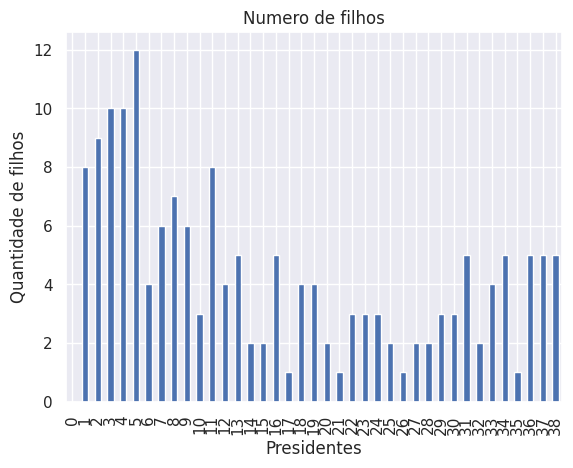

In [26]:
# Plotando a coluna Num_Filhos
sn.set()
Dados['Num_Filhos'].plot(kind='bar')
plt.xlabel('Presidentes')
plt.ylabel('Quantidade de filhos')
plt.title('Numero de filhos')
plt.show()

## **Presidente que mais tempo governou o país em sequencia**

---

In [27]:
# Encontrando quem mais tempo governou o pais

mandato_maximo = Dados.loc[(Dados['Tempo_mandado'])== Dados['Tempo_mandado'].max()]
mandato_maximo

,Nome,Data_nascimento,Falecimento,Inicio_mandato,Fim_mandato,Naturalidade,Estado,Altura,Num_Filhos,Profissões,Votos,Tempo_mandado
13,Getúlio Dornelles Vargas,1882-04-19,1954-08-24,1930-11-03,1945-10-29,São Pedro - RS,RS,163,5,Advogado,0,5474 days


## **Presidente com maior tempo de vida**

---



In [28]:
# Criando uma nova coluna com os dados de tempo de vida
Dados['Tempo_vida'] = Dados['Falecimento'] - Dados['Data_nascimento']

In [29]:
# Encontrando o presidente com mais tempo de vida

maximo_vida = Dados.loc[(Dados['Tempo_vida'])== Dados['Tempo_vida'].max()]
maximo_vida

,Nome,Data_nascimento,Falecimento,Inicio_mandato,Fim_mandato,Naturalidade,Estado,Altura,Num_Filhos,Profissões,Votos,Tempo_mandado,Tempo_vida
8,Venceslau Brás Pereira Gomes,1868-02-26,1966-05-15,1914-11-15,1918-11-15,Itajubá - MG,MG,175,7,Advogado,0,1461 days,35872 days


## **Estado que elegeu maior numero de presidentes**

---



<Axes: xlabel='Estado'>

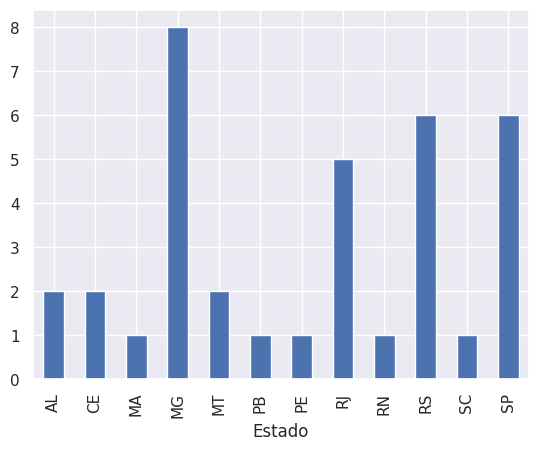

In [33]:
# Agrupando os dados por estado
Minas = Dados.groupby(["Estado"])["Nome"].nunique()
Minas.plot(kind='bar')

In [34]:
# Convertendo a coluna do tipo timedelta em int16
Dados['Tempo_mandado'] = Dados['Tempo_mandado'].dt.days.astype('int16')

In [35]:
Dados['Tempo_vida'] = Dados['Tempo_vida'].dt.days.astype('int16')

## **Análise sobre a altura dos presidentes**

---



In [37]:
altura = np.array(Dados["Altura "])
print(altura)


[178 173 167 168 170 165 168 175 175 165 173 170 168 163 165 167 163 168
 165 165 183 165 165 175 165 164 173 173 177 175 165 176 176 175 168 157
 175 185 168]


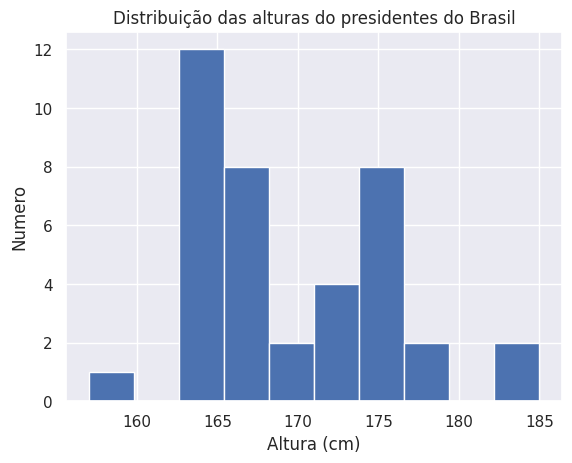

In [44]:
# Plotando um histograma para verificar a frequencia que um dado ocorre na tabela.
sn.set()
plt.hist(altura)
plt.title("Distribuição das alturas do presidentes do Brasil")
plt.xlabel("Altura (cm)")
plt.ylabel("Numero")
plt.show()

In [43]:
print("Media das alturas =", altura.mean())
print("Desvio padrão =", altura.std())
print("Menor altura =", altura.min())
print("Maior altura =", altura.max())
print("Mediana =", np.median(altura))

Media das alturas = 170.02564102564102
Desvio padrão = 5.850650542339142
Menor altura = 157
Maior altura = 185
Mediana = 168.0


## **Analise sobre a profissão dos presidentes**

---



In [47]:
# agrupando os dados pela coluna profissao
profissao = Dados.groupby(["Profissões"])["Nome"].nunique()
profissao

Profissões
Advogado            16
Economista           1
Eng. Civil           1
Eng. Eletricista     1
Metalúrgico          1
Militar             10
Médico               5
Sociólogo            1
Name: Nome, dtype: int64

<Axes: xlabel='Profissões'>

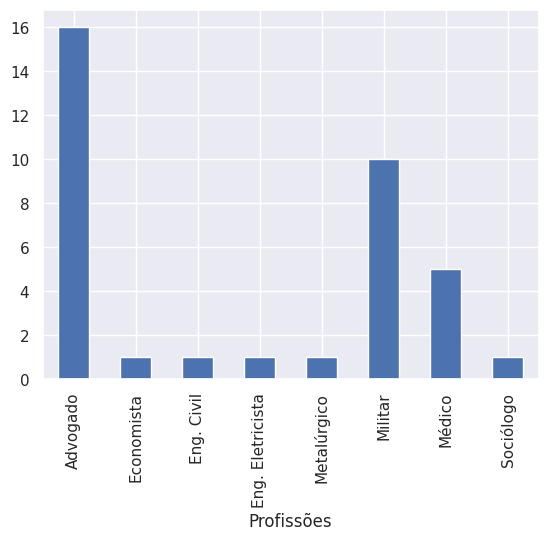

In [49]:
profissao.plot(kind='bar')

In [36]:
# Criei uma função que converte os dias em anos meses e dias, para podermos exibir os dados de tempo em um formato específico
def converte_anos_meses_dias(num):
  anos = 0
  meses = 0
  dias = 0
  while num >= 365:
      num -= 365
      anos += 1
      while num < 365 and num >=30:
          num -= 30
          meses +=1
          while num < 30 and num >= 1:
              num -= 1
              dias += 1
          resultado = print(f'{anos}  anos,  {meses}  meses e  {dias} dias')
          return resultado


In [45]:
# aplicando nossa função na coluna Tempo_vida
#Dados['Tempo_vida'] = Dados['Tempo_vida'].apply(converte_anos_meses_dias)

In [46]:
# aplicando nossa função na coluna Tempo_mandado
#Dados['Tempo_mandado'] = Dados['Tempo_mandado'].apply(converte_anos_meses_dias)